# Smoking is bad

## 1. Data Import, Cleaning and Check

In [106]:
# TODO: install all the necessary packages
import os
import sys
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import importlib


notebook_path = Path().absolute()
repo_path = notebook_path.parent
data_path = repo_path / 'data'
sys.path.append(str(repo_path))

from utils import utils, analysis
importlib.reload(utils)
importlib.reload(analysis)


<module 'utils.analysis' from '/Users/congminhnguyen/MPhil Econs and Data Science/smoking/ps_2_ex2_smoking_is_bad/utils/analysis.py'>

In [96]:
# TODO: load the data using the pathlib library to create the path to your data
df = pd.read_csv(data_path / "smoking_data.csv") 

df = pd.DataFrame(df)

In [97]:
# TODO: what are the dimensions of the data frame?
print(df.shape)
#output: (1314, 6)

(1314, 6)


In [98]:
# TODO: use .describe() on your data frame: what do you notice about the string columns?
print(df.describe())
print(df.head(15))

        Unnamed: 0          age        salary
count  1314.000000  1314.000000    614.000000
mean    656.500000    46.920091  48737.265472
std     379.463437    17.432027  28575.395264
min       0.000000    18.000000   1215.000000
25%     328.250000    32.000000  24112.250000
50%     656.500000    46.000000  48692.000000
75%     984.750000    61.000000  72946.250000
max    1313.000000    84.000000  99677.000000
    Unnamed: 0 outcome smoker  age  gender   salary
0            0   Alive    Yes   23  female   7286.0
1            1   Alive    Yes   18    male      NaN
2            2    Dead    Yes   71    male      NaN
3            3   Alive     No   67    male      NaN
4            4   Alive     No   64  female  20123.0
5            5   Alive    Yes   38    male      NaN
6            6   Alive    Yes   45  female  45895.0
7            7    Dead     No   76  female      NaN
8            8   Alive     No   28  female      NaN
9            9   Alive     No   27  female  73991.0
10          10

In [99]:
# TODO: do not forget to check the null values
null_count = df.isnull().sum()
print(null_count)
#output: salary column has 700 null values 

Unnamed: 0      0
outcome         0
smoker          0
age             0
gender          0
salary        700
dtype: int64


In [100]:
# TODO: prepare your data frame so that you can work with
df = utils.data_clean(df)
#rename columns
df = df.rename(columns={'smoker': 'smokes', 'outcome': 'alive'})
print(df.head(15))

    Unnamed: 0  alive  smokes  age  gender   salary
0            0      1       1   23  female   7286.0
1            1      1       1   18    male      NaN
2            2      0       1   71    male      NaN
3            3      1       0   67    male      NaN
4            4      1       0   64  female  20123.0
5            5      1       1   38    male      NaN
6            6      1       1   45  female  45895.0
7            7      0       0   76  female      NaN
8            8      1       0   28  female      NaN
9            9      1       0   27  female  73991.0
10          10      1       0   28    male   8860.0
11          11      1       1   34  female      NaN
12          12      1       0   20  female      NaN
13          13      0       1   72  female      NaN
14          14      1       1   48  female      NaN


## 2. Smoking analysis
Let's first check what your cousin did.

In [101]:
# TODO: Reimplement the small code snippet described in the problem set instructions.
#repeat cousins command
df.groupby(["smokes"]).agg(prob=("alive", np.mean))


/var/folders/l1/p7231y1x6wn5kz6zw2ytq6q40000gn/T/ipykernel_99119/2277085947.py:3: FutureWarning: The provided callable <function mean at 0x10d67d120> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby(["smokes"]).agg(prob=("alive", np.mean))


,prob
smokes,
0,0.685792
1,0.761168


You should get the same results.

# 3. Is smoking really good?
Now it is up to you to run the analysis further and check what could be underlying your cousings results.

### 3.1. Balance of characteristics


Balance Statistics:

Age:
          mean     std
smokes                
0       48.699  18.794
1       44.682  15.275

Gender:
gender    female      male
smokes                    
0       0.487705  0.512295
1       0.453608  0.546392

Standardized Differences:
Age: -0.235
Gender: -0.068


/Users/congminhnguyen/MPhil Econs and Data Science/smoking/ps_2_ex2_smoking_is_bad/utils/analysis.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  props = stats_dict[char]


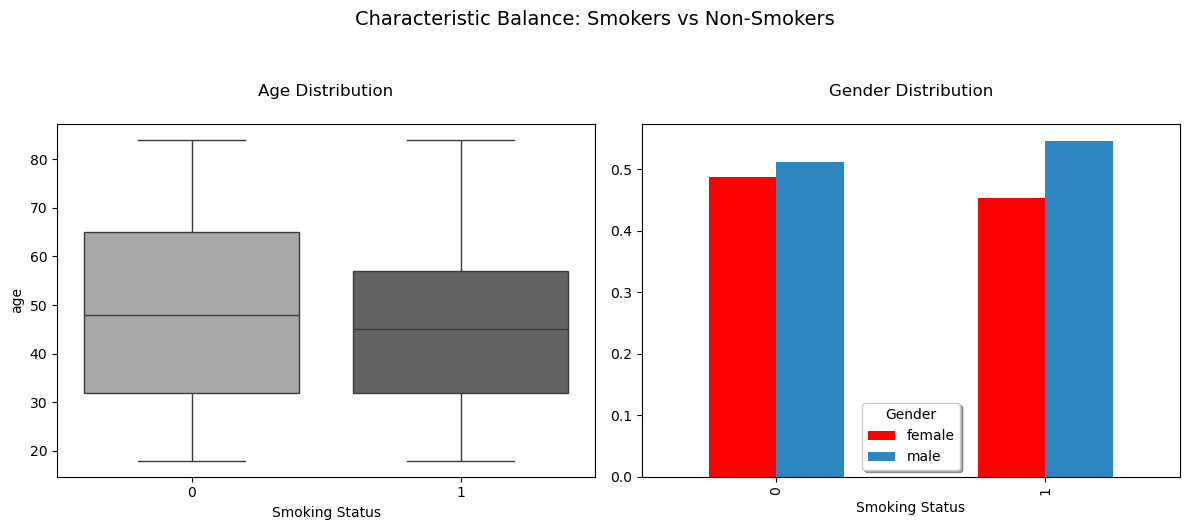

In [107]:
# Analyze characteristics
characteristics = ['age', 'gender']
results = analysis.analyze_group_characteristics(df, 'smokes', characteristics, continuous_vars=['age'])

# Display results
print("\nBalance Statistics:")
print("==================")
for char, stats in results['balance_statistics'].items():
    print(f"\n{char.capitalize()}:")
    print(stats)

print("\nStandardized Differences:")
print("========================")
for char, diff in results['standardized_differences'].items():
    print(f"{char.capitalize()}: {diff:.3f}")

plt.show()

#### There does not seem to be a characteristic balance of age and gender between the smokers (treated) and non-smokers (untreated) groups.
#### The average (and median) age of smokers is lower than that of non-smokers, and the gender distribution also differs slightly (with smokers seem to have more males than females). 
#### This is an evidence that the decision to start smoking is not random.

## 3.2. Correlation of age and gender with both smoking and survival

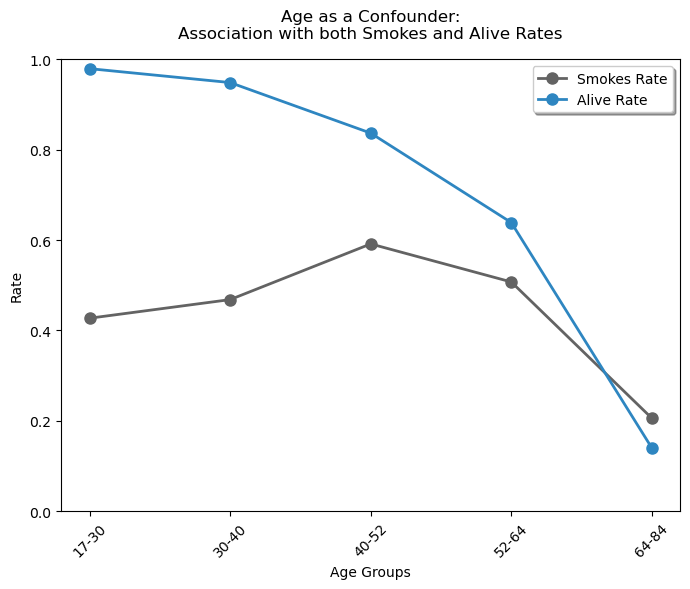

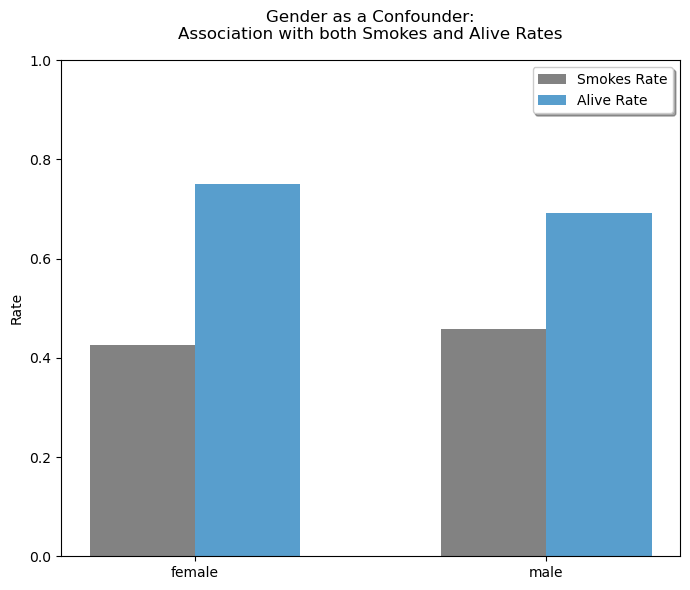

In [103]:
# Create and display all plots
age_fig, df_with_age = analysis.plot_age_relationships(df, 'alive', 'smokes')
gender_fig = analysis.plot_gender_relationships(df, 'alive', 'smokes')
plt.show()

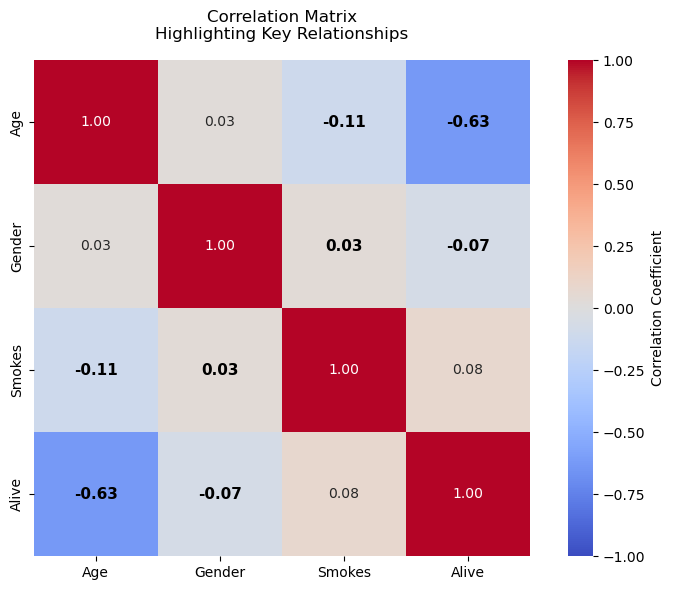

In [83]:
corr_fig, df_with_gender = analysis.plot_correlation_matrix(df, 'alive', 'smokes')
plt.show()

### There is a clear negative correlation between age and both smoking and survival.
### Furthermore, being male is associated with both higher smoking rates and lower survival rates.
### This provides evidence that the cousin's results can be heavily confounded by age and gender.
### We do not look at salary due to the overwhelming number of NaNs.
## 3.3. Effect of smoking on survival (logistic regression analysis):


Model 1: alive ~ smokes + 
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7805      0.080      9.803      0.000       0.624       0.937
smokes         0.3786      0.126      3.013      0.003       0.132       0.625

Model 2: alive ~ smokes + age + gender
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.8629      0.461     17.045      0.000       6.959       8.767
smokes        -0.2056      0.169     -1.217      0.224      -0.537       0.126
age           -0.1245      0.007    -17.194      0.000      -0.139      -0.110
male          -0.4063      0.165     -2.461      0.014      -0.730      -0.083

Model 3: alive ~ smokes + age + gender + salary
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------

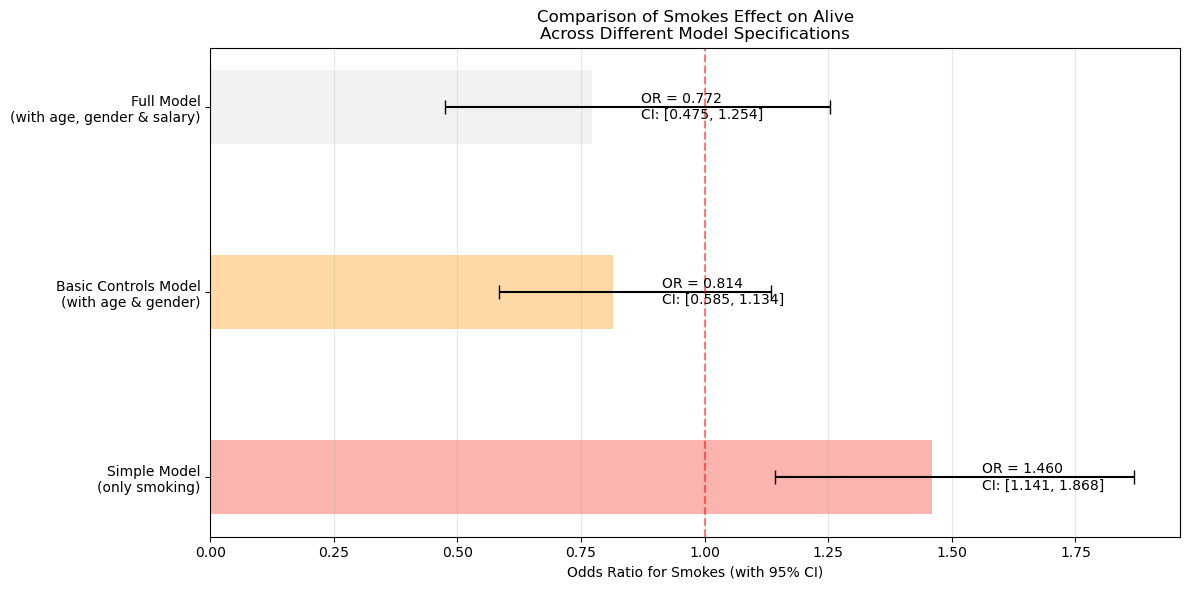

In [109]:
# Run analysis with different control sets
control_sets = [
    [],  # Model 1: no controls
    ['age', 'gender'],  # Model 2: age and gender controls
    ['age', 'gender', 'salary']  # Model 3: age, gender and salary controls
]
model_names = ['Simple Model\n(only smoking)', 
               'Basic Controls Model\n(with age & gender)',
               'Full Model\n(with age, gender & salary)']

analysis.run_logistic_regressions(df, 'alive', 'smokes', control_sets, model_names)

- The simple model (only including smoking) shows a different effect of smoking compared to the controlled models
- This difference illustrates the confounding effects of age, gender, and salary
- The odds ratio above 1 indicates that smoking appears to increase survival chances in the simple model of the cousin.
- After controlling for age and gender in the second model, we see a different relationship with smoking in fact being associated with lower survival chances (though the confidence interval overlaps with 1, meaning the effect is not statistically significant at the 5% level).
- Adding salary as a control in the third model may reveal additional confounding effects. The confidence intervals show the larger uncertainty around these estimates due to missing values in salary.
- Overall, this demonstrates how omitting important variables can lead to OVB and misleading conclusions of the effect of smoking on survival by the cousin.